In [94]:
import numpy as np
import math
import scipy as sc
import sympy as sp
from sympy import And, Or, Not
from helpers import *
import matplotlib.pyplot as plt

# Завдання 1
У коробці 5 зелених і 7 жовтих куль. Знайти ймовірність витягти жовту кулю

In [95]:
g = 5
y = 7

P_y = y / (g + y)
print(f'ймовірність витягти жовту кулю = {P_y}')

ймовірність витягти жовту кулю = 0.5833333333333334


# Завдання 2
Шість пасажирів придбали квитки на літак в одному шестимісному ряді
крісел і випадковим чином зайняли ці місця. Знайдіть ймовірності того, що
тільки 2 пасажири сіли на свої місця

In [96]:
places = 6
passengers = 6
right = 2
c_6_2 = sc.special.comb(places, right)
D_4 = derangements(places - right)
P = (c_6_2 * D_4) / sc.special.factorial(places)
print(f'ймовірність того, що тільки 2 пасажири сіли на свої місця = {P}')

ймовірність того, що тільки 2 пасажири сіли на свої місця = 0.1875


# Завдання 3
Два дійсні числа 𝑝 і 𝑞 випадково беруться з проміжку [– 2; 2]. Знайдіть
ймовірність того, що рівняння 𝑥
2 + 𝑝𝑥 + 𝑞 = 0 не має дійсних коренів.

In [97]:
rng = (-2, 2)
S = 4 * 4
p, q = sp.symbols('p q')
#p**2 - 4q < 0
#q > p**2 / 4

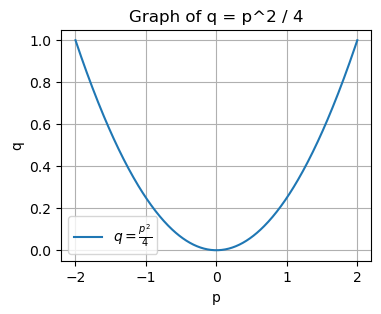

In [98]:
p_vals = np.linspace(-2, 2, 400)
q_vals = p_vals**2 / 4

# Plot the function
plt.figure(figsize=(4, 3))
plt.plot(p_vals, q_vals, label=r'$q = \frac{p^2}{4}$')
plt.xlabel('p')
plt.ylabel('q')
plt.title('Graph of q = p^2 / 4')
plt.legend()
plt.grid(True)
plt.show()

In [99]:
S_under = sp.integrate( p**2 / 4, (p, rng[0], rng[1]))
P = S_under / S
print(f'ймовірність того, що рівняння 𝑥^2 + 𝑝𝑥 + 𝑞 = 0 не має дійсних коренів = {P}')

ймовірність того, що рівняння 𝑥^2 + 𝑝𝑥 + 𝑞 = 0 не має дійсних коренів = 1/12


# Завдання 4
Перший контролер оцінює якість трьох виробів, другий — двох. Події
𝐴𝑖 ={перший контролер прийняв 𝑖-й виріб, 𝑖 = 1; 2; 3}, 𝐵𝑗 ={другий контролер
прийняв 𝑗-й виріб, 𝑗 = 1; 2}, 𝐶 ={перший контролер прийняв тільки 2 вироби,
другий — тільки 1}. Виразіть подію 𝐶 через 𝐴𝑖,𝐵𝑗.


In [100]:
A1, A2, A3, B1, B2 = sp.symbols('A1 A2 A3 B1 B2') 

C = ((A1 & A2 & A3 & B1 & ~B2) | 
     (A1 & A2 & A3 & ~B1 & B2) | 
     (A1 & A2 & ~A3 & B1 & B2) | 
     (~A1 & A2 & A3 & B1 & B2) | 
     (A1 & ~A2 & A3 & B1 & B2))


# Завдання 5
Партія виробів, яка містить 10 виробів першого сорту, 6 — другого сорту і 4
браковані вироби, випадковим способом розбивається на 3 частини у
співвідношенні 5:3:2. Знайдіть ймовірність того, що в першу частину потраплять
тільки вироби першого сорту, у другу — тільки другого сорту, а в третю — тільки
браковані. 

In [101]:
category_1, category_2, category_b = 10, 6, 4
total = category_1 + category_2 + category_b
p1, p2, p3 = 5, 3, 2
total_ways = sc.special.comb(total, p1) * sc.special.comb(total - p1, p2) * sc.special.comb(total - p1 - p2, p3)
favorable_ways = sc.special.comb(category_1, p1) * sc.special.comb(category_2, p2) * sc.special.comb(category_b, p3)
P = favorable_ways / total_ways
print(f'ймовірність того, що в першу частину потраплять тільки вироби першого сорту, у другу — тільки другого сорту, а в третю — тільки браковані = {P:.6f}')

ймовірність того, що в першу частину потраплять тільки вироби першого сорту, у другу — тільки другого сорту, а в третю — тільки браковані = 0.000065


# Завдання 6
Прилад, установлений на борту літака, працює у двох режимах: нормальному
під час крейсерського польоту і в умовах перевантаження при зльоті і посадці.
Крейсерський режим займає 70% усього часу польоту, а зліт і посадка — 30%.
Ймовірність виходу приладу з ладу під час крейсерського польоту дорівнює 0,01, 
24
а при зльоті і посадці — 0,04. 1) Знайдіть надійність (ймовірність безвідказної
роботи) приладу за весь час польоту. 2) Під час польоту прилад вийшов із ладу.
Знайдіть ймовірності того, що це сталося у крейсерському режимі. 

In [102]:
#A - прилад вийшов із ладу
#B1 - крейсерський режим
#B2 - зльот і посадка
P_B1 = 0.7
P_B2 = 0.3
P_A_B1 = 0.01
P_A_B2 = 0.04

P_A = P_B1 * P_A_B1 + P_B2 * P_A_B2
reliability = 1 - P_A

P_B1_A = (P_A_B1 * P_B1) / P_A
print(f'надійність приладу за весь час польоту = {reliability:.6f}')
print(f'ймовірність того, що це сталося у крейсерському режимі = {P_B1_A:.6f}')

надійність приладу за весь час польоту = 0.981000
ймовірність того, що це сталося у крейсерському режимі = 0.368421


# Завдання 7
Здійснюють 12 пострілів по мішені. Ймовірність влучання становить 0,5. Яка
ймовірність того, що буде 6 влучань? 

In [103]:
shoots = 12
P_hit = 0.5
hits = 6

P = sc.special.comb(shoots, hits) * P_hit**hits * (1 - P_hit)**(shoots - hits)
print(f'ймовірність того, що буде 6 влучань = {P:.6f}')

ймовірність того, що буде 6 влучань = 0.225586


# Завдання 8
У великій партії з 10000 товарів 3% дефектні. Яка ймовірність того, що серед
200 випадково вибраних товарів 6 будуть дефектними? 

In [104]:
amount = 10000
defective = 0.03
n = 200
k = 6

x = (k - n * defective) / math.sqrt(n * defective * (1 - defective)) #нормаване відхилення
gauss_value = sc.pdf(x, 0, 1)
P = gauss_value / math.sqrt(n * defective * (1 - defective))
print(f'ймовірність того, що серед 200 випадково вибраних товарів 6 будуть дефектними = {P:.6f}')

AttributeError: Module 'scipy' has no attribute 'pdf'